# HW3 Assignment II Notebook
### This notebook contains the second deliverable for HW3
This deliverable presents the initial steps of a data analysis using the Citibike Punblic Datasets

The general flow of the notebook follows:

1) Fetch the Citibike Data from the AWS Blob and store a local copy

2) Use pandas to read in the local copy of the CitiBike files,into a DF

3) Display the top few rows of the DF in your notebook. This table must be rendered.

4) Display the reducted dataframe. This table must be rendered.

5) Plot your data distributions.

### Idea
#### There is higher usage of citibikes during rush hours on weekdays than during the same hours on weekends

#### H0 The ratio of rush hour trips to non-rush hour trips on weekdays is the same or smaller than the ratio of rush hour trips to non-rush hour trips on weekends.

In [17]:
#Import modules, initialize the random generator
from __future__ import print_function
import pandas as pd
import numpy as np
import pylab as pl
import os
import matplotlib.mlab as mlab

%pylab inline

#puidir = os.getenv("PUIDATA")
#print (puidir)

Populating the interactive namespace from numpy and matplotlib
/home/cusp/sbg389/PUIdata


In [18]:
#Helper function to download local copies of the Citibike data by Federica Bianco
#https://github.com/fedhere/PUI2016_fb55/blob/master/HW3_fb55/citibikes_gender.ipynb

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [21]:
#Download the data using Federica's helper function
datestring = '201401'
getCitiBikeCSV(datestring)

file in place, you can continue


In [84]:
#Read the CSV into a data framw
df=pd.read_csv(os.getenv("PUIDATA")+'/' + datestring + '-citibike-tripdata.csv')

#Handle conversion of the string date into a new date collumn
df['date'] = pd.to_datetime(df['starttime'])
df['dateIndex'] = pd.to_datetime(df['starttime'])
df.head(4)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,dateIndex
0,471,2014-01-01 00:00:06,2014-01-01 00:07:57,2009,Catherine St & Monroe St,40.711174,-73.996826,263,Elizabeth St & Hester St,40.717290,-73.996375,16379,Subscriber,1986,1,2014-01-01 00:00:06,2014-01-01 00:00:06
1,1494,2014-01-01 00:00:38,2014-01-01 00:25:32,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,15611,Subscriber,1963,1,2014-01-01 00:00:38,2014-01-01 00:00:38
2,464,2014-01-01 00:03:59,2014-01-01 00:11:43,228,E 48 St & 3 Ave,40.754601,-73.971879,2022,E 59 St & Sutton Pl,40.758491,-73.959206,16613,Subscriber,1991,1,2014-01-01 00:03:59,2014-01-01 00:03:59
3,373,2014-01-01 00:05:15,2014-01-01 00:11:28,519,Pershing Square N,40.751884,-73.977702,526,E 33 St & 5 Ave,40.747659,-73.984907,15938,Subscriber,1989,1,2014-01-01 00:05:15,2014-01-01 00:05:15


In [86]:
#Selecting the columns that are necessary for the analsis
df = df[['date','dateIndex']]
df.set_index('dateIndex', inplace = True)
df.head()


,date
dateIndex,
2014-01-01 00:00:06,2014-01-01 00:00:06
2014-01-01 00:00:38,2014-01-01 00:00:38
2014-01-01 00:03:59,2014-01-01 00:03:59
2014-01-01 00:05:15,2014-01-01 00:05:15
2014-01-01 00:05:18,2014-01-01 00:05:18


In [87]:
#Create a dataframe contining the rush hour trips, using the dataframe between_time method.
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.between_time.html
#http://stackoverflow.com/questions/24576786/how-to-use-dataframe-between-time-function 

df_rushMorning = df.between_time("6:30","9:30")
df_rushEvening = df.between_time("15:30","20:00")
df_rush = pd.concat(([df_rushMorning,df_rushEvening]))
df_rush.head()

,date
dateIndex,
2014-01-01 06:31:48,2014-01-01 06:31:48
2014-01-01 06:32:08,2014-01-01 06:32:08
2014-01-01 06:32:15,2014-01-01 06:32:15
2014-01-01 06:32:40,2014-01-01 06:32:40
2014-01-01 06:34:06,2014-01-01 06:34:06


In [89]:
#Create a dataframe contining the non rush hour trips, using the dataframe between_time method.

df_nonRushDay = df.between_time("9:30","15:30")
df_nonRushNight = df.between_time("20:00","6:30")
df_nonRush = pd.concat(([df_nonRushDay,df_nonRushNight]))
df_nonRush.head()

,date
dateIndex,
2014-01-01 09:30:52,2014-01-01 09:30:52
2014-01-01 09:30:58,2014-01-01 09:30:58
2014-01-01 09:31:20,2014-01-01 09:31:20
2014-01-01 09:31:36,2014-01-01 09:31:36
2014-01-01 09:31:38,2014-01-01 09:31:38


date
0    24521
1    11951
2    21398
3    24119
4    21587
5    15419
6    18300
Name: date, dtype: int64
date
0    32151
1    18154
2    28010
3    35020
4    30536
5     8345
6    10901
Name: date, dtype: int64
date
0    1.311162
1    1.519036
2    1.309001
3    1.451967
4    1.414555
5    0.541215
6    0.595683
Name: date, dtype: float64


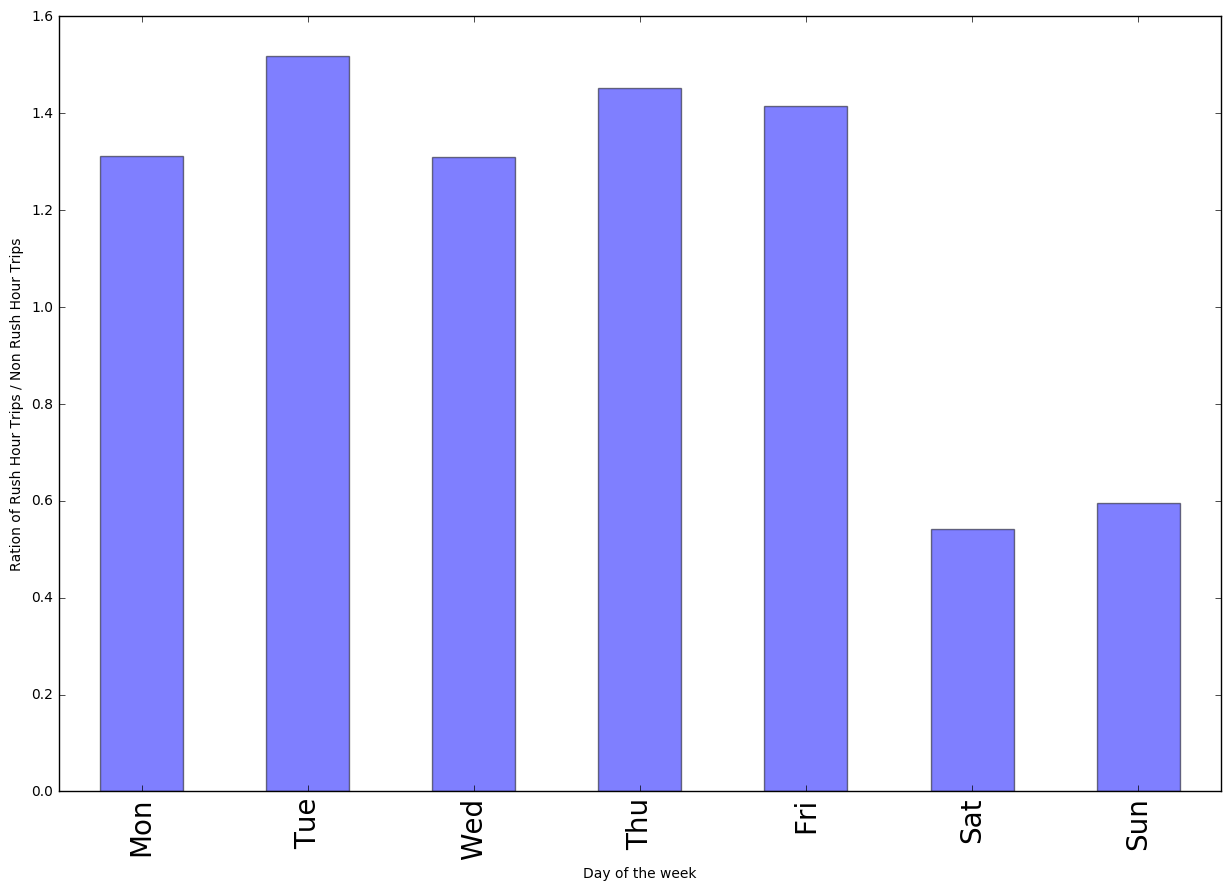

In [108]:
#Plotting the data for both dataframes trying to express the difference that we sustain on the hypotesis

fig=pl.figure(figsize(15,10))

df_countRushDay = df_rush.date.groupby([df_rush.date.dt.weekday]).count()
df_countNonRushDay = df_nonRush.date.groupby([df_nonRush.date.dt.weekday]).count()

print (df_countNonRushDay)
print (df_countRushDay)

#The ration between rush hour trips Vs Non Rush Hour Trips
print (df_countRushDay/df_countNonRushDay)

ax = ((df_countRushDay/df_countNonRushDay)).plot(kind="bar", alpha=0.5, label='non rush hour trips')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Ration of Rush Hour Trips / Non Rush Hour Trips")
ax.set_xlabel ("Day of the week")